# Homework 6: Exploring Uber and Lyft Prices in Boston

Name:Dominique Bradshaw and La'Mia Crutchfield

Student ID:

Collaborators:


## Instructions

This homework is an _open-ended midterm project_ for our class. 

We will be using the techniques and approaches introduced in the first half of the semester, focussing on M0, M1, M2, and M6. 
> **Note:** You may do some supervised learning (as covered in M3 and M4), however, this should not be the _only_ thing(s) you do. We definitley want to see DS workflow/life-cycle (**M1**), lots of EDA (**M2**) and a discussion of ethical issues (**M6**):

* **[M0] Python for DS**
* **[M1] The DS and ML Workflows**
* **[M2] Exploratory Data Analsyis**
* [M3] Linear Regression (if applicable - depends on problem/dataset)
* [M4] Linear Classification (if applicable - depends on problem/dataset)
* [M5] Sentiment Analysis (if applicable - depends on problem/dataset)
* **[M6] Ethical Thinking for DS**

The main focus of this project is on the first three modules [M0]-[M2], as well as the ethical consderations for DS from [M6]. In particular, it will be helpful to review **Lab 2 & hw2 (Analyzing the MoMA Data)** first. Most of the things you will do in this midterm project are explained in `Lab2` and `hw2`. Then, review the other labs and hws to recap the  general workflow of our DS approaches to the various problems we have worked on so far. This will help you to be prepared for all the steps in this project, so that you do not miss anything. 

In gernal, you should feel free to import any package that we have previously used in class; you might want to also experiemnt with or use other packages. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend). 

Additionally, note that this assignment is more like a project than a typical homework and it will have a slightly different structure than the hws in the past. One of the reasons why Jupyter Notebooks are so popular in the field is because you can really treat them like notebooks to explain your findings as you discover them. In this assignment, we provide some **Problem** stubs following the EDA/DS workflow and you will need to fill in the analysis and structure as you go. Note that you will be partially graded on the presentation (_cleanliness, clarity, comments_) of your notebook so make sure you [Marie Kondo](https://lifehacker.com/marie-kondo-is-not-a-verb-1833373654) your notebook before submitting it.

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. 

Frequently **save** your notebook!

### Collaborators and Sources
Furthermore, in addition to recording your **collaborators** on this homework, please also remember to **cite/indicate all external sources** used when finishing this assignment. 
> This includes peers, TAs, and links to online sources. 

Note that these citations will not free you from your obligation to submit your _own_ code and write-ups, however, they will be taken into account during the grading and regrading process.

In [2]:
# collaborators and sources:
# Albert Einstein and Marie Curie
# https://developers.google.com/edu/python/strings

# your code here
answer = 'my answer'

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utility.util import configure_plots
configure_plots()
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
#all of the things I think we could need here, hmm

## 1. Introduction

For our midterm project this semester, we'll take a look at data for numerous Lyft and Uber rides in Boston and their prices (https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma). Our goal will be to use this dataset to gain some insight about characteristics of rides and _perhaps_ find some patterns in this data.

In general, we will be following the EDA process:
1. Get the data and gain **basic understanding**
2. **Wrangle** the data
3. **Profile** the data
4. Develop questions to investigate (form a **hypotheses**)
5. Use the data to **investigate** hypothesis
6. **Summarize** results and answer questions 
7. **Critically review** our workflow and discuss ethical concerns

## 2. Getting Familiar with the Data

In this section, we will get a feel for our data and tidy it up so that we can analyize it later. 
Download the data from the source/link given above and be sure to save the data in a folder called `data` under the `utility` directory. Your final path should look like `utility/data/rideshare_kaggle.csv` -- if it doesn't **we will not be able to properly grade your assignment!**

<!-- BEGIN QUESTION -->

### Problem 1

Let's start by taking a look at our data.

**Write-up!** Describe the data, answering questions including, but not limited to, these: Where does the data come from? How was it obtained? How many examples and features does the dataset have? What kinds of features are in the dataset? What values can these features take?
> **Hint**: Consider the steps of EDA; what would you like to know about this dataset. 

The data comes from  Uber and Lyft in Boston, MA  from 11-26-2018 to 12-18-2018.How the information was obtained was not dsiclosed Our data has 693071 data points and 57 features. We have mostly non-catgeorical data types. The values of these features will depend on the data itself. For example, the "Trip date and time" feature may contain timestamps, while the "Pickup and drop-off locations" feature would have location data. Other features, like "Fare amount" and "Distance," would contain numerical values.The features consists of ID, time-related aspects(timestamp, hour, day, month, etc.) of the day, the settings of the day (temperatures, expected temperatures, tempMax, tempMin), locations, basically anything related to the settings of the day of the lyft/uber ride.


In [38]:
#Load raw data 
rideshare= pd.read_csv("./utility/data/rideshare_kaggle.csv")
# Exploring the data
features = rideshare.columns
print(features)
rideshare.head()

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [39]:
rideshare.count()

id                             693071
timestamp                      693071
hour                           693071
day                            693071
month                          693071
datetime                       693071
timezone                       693071
source                         693071
destination                    693071
cab_type                       693071
product_id                     693071
name                           693071
price                          637976
distance                       693071
surge_multiplier               693071
latitude                       693071
longitude                      693071
temperature                    693071
apparentTemperature            693071
short_summary                  693071
long_summary                   693071
precipIntensity                693071
precipProbability              693071
humidity                       693071
windSpeed                      693071
windGust                       693071
windGustTime

In [40]:
rideshare.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


### Problem 2

Let's do some data wrangling. 

**Write up!** Considering your description of the dataset from [Problem 1](#Problem-1), how should we clean this data?

**Do this!** In the cells below, **explain** and perform the steps that you need to prepare this data for further analysis. Make sure that your implementations and write-ups (for processing and analysis) are presented well and effectively describe your workflow. You should add comments and markdown cells for your documentation as you see fit!  

*Grading Note: Your work will be graded for _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report.*

> **Hint**: You can use our previous labs as examples of how you might do this. 
Also, you might want to come back to this step later on, since you might encounter problems with the data once you actually analyze it. Remember, you may add as many cells (for code and text) as you need below. Here — we gave you one for free!

Steps: We need to decide and categorize the kinds of data types, like between categorical and non-categorical and possbily what features we should not use due to ethical reasons 

In [41]:
# Check for missing values
missing_values = rideshare.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime         

In [42]:
# Handle missing values, in this case, we will drop them
#rideshare['price'].fillna(rideshare['price'].mean(), inplace=True)
rideshare.dropna(subset=['price'], inplace=True)

In [27]:
# Remove duplicates
rideshare.drop_duplicates(inplace=True)

### Problem 3

**Do this!** Now that we cleaned up our data, we are ready to look into it. In this problem, we want to profile our data and explore its variables.

> **Hint**: Note that the way some data is stored does not necesarily mean that each column should correspond to a seperate variable. Feel free to define your own variables based on the input data. Looking at the dataset documentation might be helpful to figure out meaningful representations. Also note that there are no right or wrong representations here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variable representations). Again, you might want to iterate over this step again later after doing some more exploration. 

> **Hint**: Recall from Lab 2, this step usually involves computing summary statistics and basic plots _where applicable_. Try plotting some of the data (with appropriate plots; remember the lecture content - some plots introduced in there ( we did not yet use in the lab or hw) could be useful). Then, highlight a few of the more interesting ones and discuss why you thought they were interesting — for both our sakes, **please only include the most interesting ones** in your actual submission!!  Again note that there are no right or wrong features to choose here (since it is your job to find something interesting in the data, it is also up to you to choose the data/variables to include). Just be sure to make a selection. You will not receive any credit by simply plotting everything!  

*Grading Note*: Your work will be graded for _creativity_ and _aesthetics_. Be creative in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures.* 

Once again, we have provided a _free_ cell for you to use; make as many as you need. Use text/markdown cells to describe what you are doing and what your findings are. 

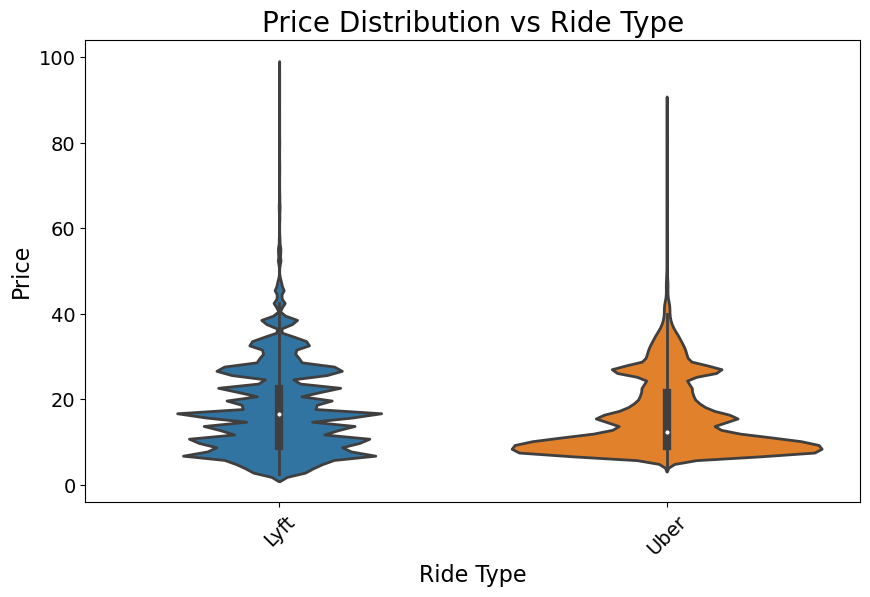

In [28]:
# Price Distribution by Ride Type
plt.figure(figsize=(10, 6))
sns.violinplot(data=rideshare, x='cab_type', y='price')
plt.xlabel('Ride Type')
plt.ylabel('Price')
plt.title('Price Distribution vs Ride Type')
plt.xticks(rotation=45)
plt.show()


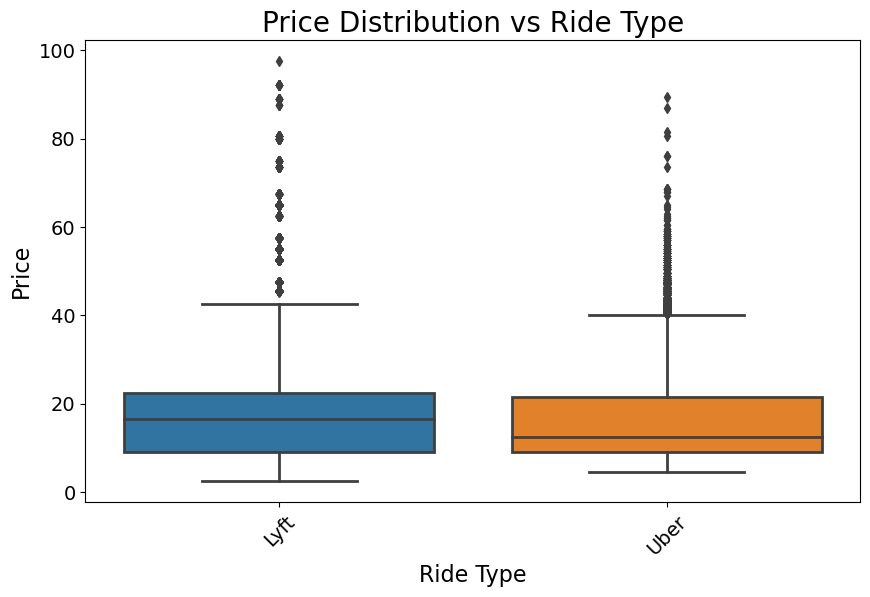

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=rideshare, x='cab_type', y='price')
plt.xlabel('Ride Type')
plt.ylabel('Price')
plt.title('Price Distribution vs Ride Type')
plt.xticks(rotation=45)
plt.show()

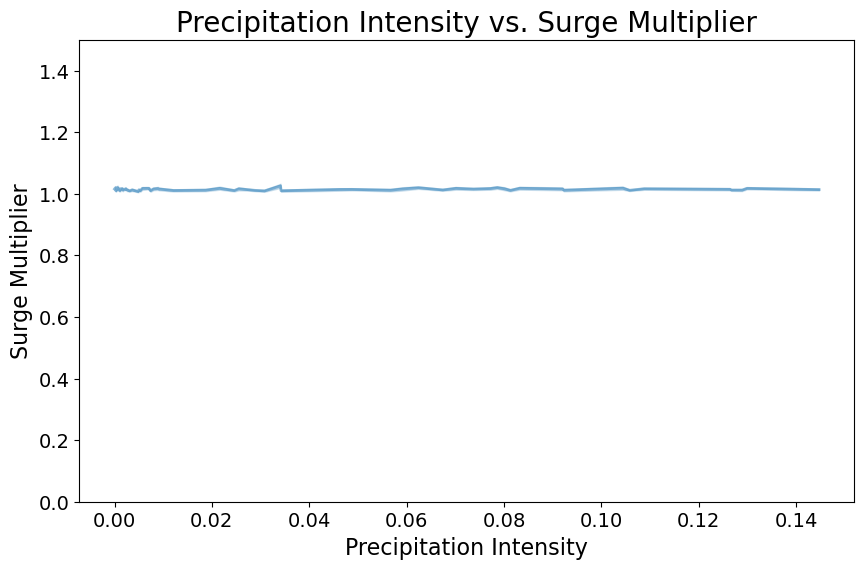

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=rideshare, x='precipIntensity', y='surge_multiplier', alpha=0.5)
plt.xlabel('Precipitation Intensity')
plt.ylabel('Surge Multiplier')
plt.title('Precipitation Intensity vs. Surge Multiplier')
plt.ylim(0, 1.5)
plt.show()

## 3. Asking the Hard Questions

By now we should know all of the ins and outs about this dataset (right?). Let's dive a little deeper into it and see if we can find anything interesting.

### Problem 4

As you worked through the initial data processing and understanding phase, did anything catch your interest? Let's formulate some questions and hypotheses that you could explore in depth.

**Write-up!** Formulate and describe a question you have/want to investigate. Then, formulate and describe a hypothesis that can (possibly) answer it. What inspired your idea (provide specifics from [the last section](#2.-Getting-Familiar-with-the-Data), if any)? How can you use the data to support or reject your hypothesis?

> **Hint**: Your question/hypothesis might be something that you are personally interested in or something that you think might lead to a product or service for users/customers. You might want to think about something that could help others in making decisions, etc.

*Grading Note: Your work will be graded for _creativity_. Be creative in the questions you ask/hypothesis you pose.* 

Hypothesis: Uber fares are expected to consistently exhibit a more cost-effective pricing structure in comparison to Lyft fares, irrespective of environmental variables such as weather conditions and time of day or month.

Our research focus is oriented towards the examination of pricing disparities inherent to each ride-sharing service, stemming from factors such as quality, operational policies, and associated fees.

Our empirical analysis will discern the overall pricing discrepancies across the spectrum of ride-sharing services, independent of the influences of factors such as distance, meteorological conditions, and temporal considerations. This, in turn, will enable us to provide discerning customers with insights into the underlying determinants of price differentiation, empowering them to make informed choices in accordance with their budgetary preferences.

### Problem 5

**Do this!** Let's explore your hypothesis. Find evidence from the data that supports or refutes your hypothesis and present it — recall that as a data scientist, one of your goals is to discover and communicate your results to your audience, _me_. The more thorough your analysis, the better!

> **Hint**: Even though we focus on EDA here, you may include some predictive modeling here as well. 

Here's yet another _free_ cell; use as many as you need.

In [34]:
uber_data = rideshare[rideshare['cab_type'] == 'Uber']
lyft_data = rideshare[rideshare['cab_type'] == 'Lyft']

X_uber = uber_data[['distance']]
y_uber = uber_data['price']
X_uber_train, X_uber_test, y_uber_train, y_uber_test = train_test_split(X_uber, y_uber, test_size=0.3, random_state=11)

X_lyft = lyft_data[['distance']]
y_lyft = lyft_data['price']
X_lyft_train, X_lyft_test, y_lyft_train, y_lyft_test = train_test_split(X_lyft, y_lyft, test_size=0.3, random_state=11)

average_price_uber = np.mean(y_uber_train)
average_price_lyft = np.mean(y_lyft_train)
print(average_price_uber)
print(average_price_lyft)

15.786159716850262
17.360470200060416


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

uber_model = LinearRegression()
lyft_model = LinearRegression()

uber_model.fit(X_uber_train, y_uber_train)
lyft_model.fit(X_lyft_train, y_lyft_train)

uber_predictions = uber_model.predict(X_uber_test)
lyft_predictions = lyft_model.predict(X_lyft_test)

uber_mae = mean_absolute_error(y_uber_test, uber_predictions)
lyft_mae = mean_absolute_error(y_lyft_test, lyft_predictions)

uber_mse = mean_squared_error(y_uber_test, uber_predictions)
lyft_mse = mean_squared_error(y_lyft_test, lyft_predictions)

uber_r2 = r2_score(y_uber_test, uber_predictions)
lyft_r2 = r2_score(y_lyft_test, lyft_predictions)

print("Uber Model:")
print(f"Mean Absolute Error: {uber_mae:.2f}")
print(f"Mean Squared Error: {uber_mse:.2f}")
print(f"R-squared (R2): {uber_r2:.2f}")

print("\nLyft Model:")
print(f"Mean Absolute Error: {lyft_mae:.2f}")
print(f"Mean Squared Error: {lyft_mse:.2f}")
print(f"R-squared (R2): {lyft_r2:.2f}")

Uber Model:
Mean Absolute Error: 6.69
Mean Squared Error: 64.96
R-squared (R2): 0.11

Lyft Model:
Mean Absolute Error: 7.39
Mean Squared Error: 86.86
R-squared (R2): 0.13


### Problem 6

**Write up!** Did you find anything interesting in [Problem 5](#Problem-5)? If you did, tell me about it. If you don't think you found anything interesting, keep looking. 

> **Hint**: Provide links to key figures in your discussion. See [this StackOverflow question](https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown) for details.

The average price of Uber in relation to distance is $15.77 whereas the average price of Lyft in relation to distance is $17.36. There is a $1.59 price difference between the two cabs. While this may seem indifferent to some customers, for customers who use the transportation services regularly, this price adds up. In a day, that is an additional $3.18 for one ride back and forth, $6.36 for two rides back an forth. In a week, $22.26 for one ride back and forth each day, $44.52 for two rides back and forth each day. In a month, around $95 for one ride back and forth for 30 days, around $190 for two rides back and forth for 30 days. The price adds up and for areas where many people do not own cars such as Chicago, New York, and other big cities, in addition to the high cost of living, customers would be interested in spending less.

Also, from Uber's dataset, there is a lower Mean Absolute Error of 6.69 than Lyft's dataset in which the Mean Absolute Error is 7.39. Therefore, the machine learning model for Uber has less errors than the machine learning model for Lyft.

Uber has a smaller Mean Squared Error of 64.96 in comparison to Lyft's Mean Squared Error of 86.86. This means that Uber's estimates are closer to the actual values than Lyft's, supporting the idea that Uber's prices are better than Lyft's.

Surprisingly, the Lyft regression model fits the data better and has a better performance with 0.13 in comparison to Uber's regression model fo 0.11. Although this may indicate a better fit, both values are fairly low, leaving a conclusion that the model may not actually explain any of the variability in the dependent variables. Also, a low R-squared could indicate that the model may not actually be a good fit for the data.


### Problem 7
One last step that we shouldn't skip is reviewing both our data analysis approach and also the data acquisition method. 

**Write up!** Are there any shortcommings and/or **ethical issues** related to the way you used this data or formed your conclusions?
* Who are the stakeholders?
* How could someone other than yourself be impacted by any ethical issues arising from your analysis/work/product?
* Can you propose a way to resolve the issue(s)?

Stakeholders: The manufacturers of the models that calculate the prices for riders/customers are stakeholders that do the affecting. The drivers/employees are affected by the model/app as the prices may determine how many rides they give in a day, affecting their wages. The riders/customers are affected by the prices of the rides as well as the actual experience of the rides. If drivers aren't being paid a livable wage, there will be a decrease in supply and an increase in demand in which there will be less drivers and a disproportionate amount of riders/customers to each driver.
 
Impacted by ethical issues: One of the ethical issues is the surging prices of the services. With the reliance on transportation systems in big cities, especially New York, surging prices can seem exploitative as other transportation systems (trains, buses, etc.) usually have fixed prices. With the surging of prices and need for transportation in big cities where most citizens don't have cars and high traffic, high prices/price surges may seem like companies like Lyft with higher prices are taking advantage of its customers.

Resolution: A resolution to the exploitation of prices is to set a fixed price for distance as well as a fixed price for time of day. Also, if companies consult each other rather than focusing on beating competition. This would demostrate fairer practices, which would increase the demand of their transportation services.

Let's conclude with thinking about imporvements for the future! 

**Write up!** There are often times where the data you need doesn't exist (yet) and you need to go collect it. Based on your analysis of the data set, which features were informative and which weren't? What information that was missing from this dataset do you think would be helpful to have for next time?

The features that were helpful were source, destination, distance (needed source and destination to get the distance), cab type, and price were informative in our analysis of relationships as we rarely found meaningful relationships between weather (precipitation, UVIndex, visibility, wind, temperature, etc.). Features that were not informative were features related to weather, sunrise, sunset, moonphase, temperature, etc.) because of the lack of relationships that we found with prices, price surges, and more. it would be helpful to have the volume of rides for each day, week, and month so we can determine if there is a relationship between the non-informative features as well as the informative features to see if the volume of rides are affected in any way.

And that's it! Remember to review your work and make sure it is well presented and organized. Not everyting you coded up needs to remain in your submission. **[Does [this cell] spark joy?](https://i.kinja-img.com/gawker-media/image/upload/s--iW_3HGbT--/c_scale,dpr_2.0,f_auto,fl_progressive,q_80,w_800/oruf4oavtj5vpmvaquew.jpg)** You are always trying to communicate your findings to somebody, _maybe even yourself_. 

> **Final Grading Note/Reminder**: Your work will be graded for _creativity_, _aesthetics_, _readability_, _style_, and _cleanlines_. So, carefully document your code and use descriptive/intuitive variable names. For write-ups use consice and clear language like in a written project report. Be creative in the questions you ask/hypothesis you pose as well as in the plots you use and select visulatizations and colors that make for a plesant and intuitive viewing expereince. The goal of a good visualization is that the viewer will quickly understand your figures. 

### Submission instructions
* Check to make sure that your code runs without error on a fresh kernel. Within jupyter, **Kernel -> Restart & Run All**. 
* **Save your notebook!**
* Submit this Python notebook, including your answers in the code cells as homework submission. **Be sure to add your partner to the submission as well**.
* After submitting, navigate to the **code tab** to view your submission. Verify that all your write-ups, markdown cells, and visualizations appear correctly on Gradescope. This is the **exact** view the graders will see when grading your work, so make sure that everything looks as expected.